In [1]:
import tensorflow as tf
from d2l import tensorflow as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

4423680/4422102 [==============================] - 1s 0us/step


## 1.  Initializing Model Parameters
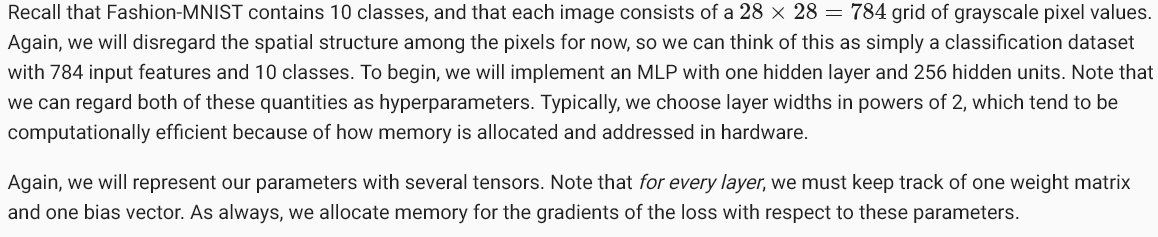

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = tf.Variable(tf.random.normal(shape=(num_inputs, num_hiddens), mean=0, stddev=0.01))
b1 = tf.Variable(tf.zeros(num_hiddens))

W2 = tf.Variable(tf.random.normal(shape=(num_hiddens, num_outputs), mean=0, stddev=0.01))
b2 = tf.Variable(tf.random.normal([num_outputs], stddev=.01))

params = [W1, b1, W2, b2]

## 2. Activation Function
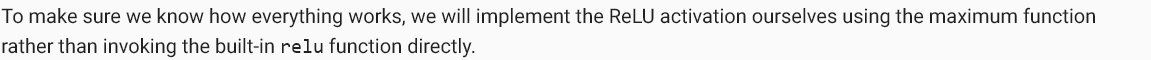

In [3]:
def relu(X):
    return tf.math.maximum(X, 0)

## 3. Defining the Model
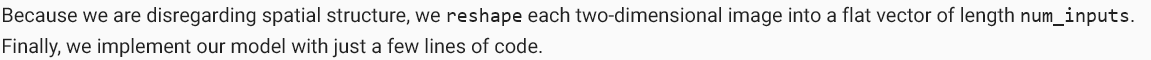

In [4]:
def net(X):
    X = tf.reshape(X, (-1, num_inputs))
    H = relu(tf.matmul(X, W1) + b1)
    return tf.matmul(H, W2) + b2

## 4. Loss Function
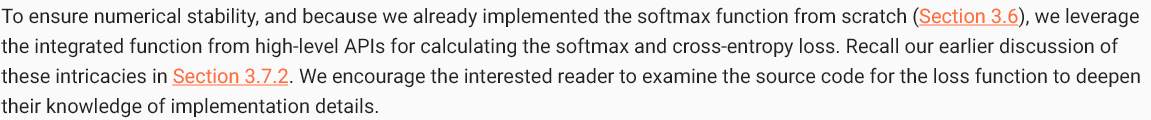

In [5]:
def loss(y_hat, y):
    return tf.losses.sparse_categorical_crossentropy(y, y_hat, from_logits=True)

## 5. Training
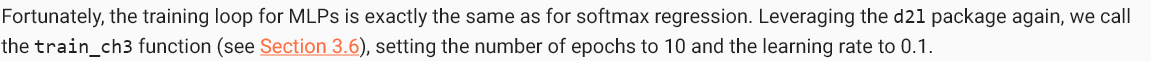

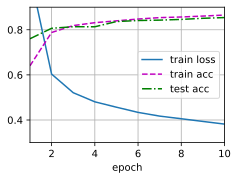

In [6]:
num_epochs, lr = 10, 0.1

updater = d2l.Updater([W1, W2, b1, b2], lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

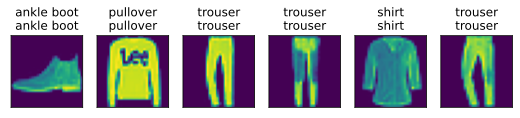

In [7]:
d2l.predict_ch3(net, test_iter)